# A Comparative Study of Predicting Loan Status of a Lending Company using Various Machine Learning Algorithms

This notebook shows the code for my Final Year Project: A Comparative Study of Predicting Loan Status of a Lending Company using Various Machine Learning Algorithms

# Import libraries

In [1]:
import os
os.getcwd()

'c:\\Users\\terre\\Desktop\\Personal Projects\\Terrence FYP\\FYP Code & Dataset'

In [2]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
from xgboost import XGBRFClassifier, XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from pandas_profiling import ProfileReport
from pandas_dq import dq_report, Fix_DQ
from lazypredict.Supervised import LazyClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, roc_curve, recall_score, auc, f1_score, cohen_kappa_score, matthews_corrcoef
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.discriminant_analysis import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neural_network import *
from sklearn.cluster import *
from sklearn.mixture import *
from sklearn.linear_model import *
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multiclass import *
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

# Set options for displaying data
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
sns.set(style = "whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(rc = {'figure.figsize':(3,3)})
sns.set_style('whitegrid')
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action = 'ignore', category = DataConversionWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


# Read the data

In [3]:
acc_data = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory = False)
df = pd.DataFrame(acc_data)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,Jan-2019,122.67,NaN,Mar-2019,564.00,560.00,0.00,30.00,1.00,Individual,NaN,NaN,NaN,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,Jun-2016,926.35,NaN,Mar-2019,699.00,695.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.

# Checking Data Issues

- Automated EDA

In [4]:
# profile = ProfileReport(df)
# profile.to_file('Terrence FYP EDA.html')

- Sampling to reduce work

In [5]:
df = df.sample(frac = 0.3, axis = 0, random_state = 0).reset_index(drop = True)

- Checking Null Values

In [6]:
nul = df.isnull().mean().sort_values()

nul

id                                           0.00
fico_range_high                              0.00
hardship_flag                                0.00
revol_bal                                    0.00
initial_list_status                          0.00
out_prncp                                    0.00
out_prncp_inv                                0.00
total_pymnt                                  0.00
total_pymnt_inv                              0.00
total_rec_prncp                              0.00
total_rec_int                                0.00
total_rec_late_fee                           0.00
recoveries                                   0.00
last_pymnt_amnt                              0.00
last_fico_range_high                         0.00
last_fico_range_low                          0.00
policy_code                                  0.00
application_type                             0.00
fico_range_low                               0.00
addr_state                                   0.00


In [7]:
nul = nul[nul>0.3]

nul

inq_fi                                       0.38
max_bal_bc                                   0.38
open_rv_24m                                  0.38
open_rv_12m                                  0.38
open_act_il                                  0.38
total_bal_il                                 0.38
open_il_24m                                  0.38
open_il_12m                                  0.38
inq_last_12m                                 0.38
total_cu_tl                                  0.38
open_acc_6m                                  0.38
all_util                                     0.38
mths_since_rcnt_il                           0.40
il_util                                      0.47
mths_since_last_delinq                       0.51
next_pymnt_d                                 0.60
mths_since_recent_revol_delinq               0.67
mths_since_last_major_derog                  0.74
mths_since_recent_bc_dlq                     0.77
mths_since_last_record                       0.84


In [8]:
nul_col = nul.sort_values(ascending = False).index

nul_col

Index(['member_id', 'orig_projected_additional_accrued_interest', 'hardship_start_date', 'hardship_last_payment_amount', 'hardship_type', 'hardship_length', 'payment_plan_start_date', 'hardship_end_date', 'hardship_payoff_balance_amount', 'hardship_amount', 'deferral_term', 'hardship_status', 'hardship_reason', 'hardship_dpd', 'hardship_loan_status', 'settlement_term', 'settlement_amount',
       'settlement_date', 'settlement_status', 'debt_settlement_flag_date', 'settlement_percentage', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'sec_app_mort_acc', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_inq_last_6mths', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'revol_bal_joint',
       'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_der

- Dropping Columns with Missing Values > 30%

In [9]:
data = df.drop(nul_col, axis = 1)

data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,134404767,20000.00,20000.00,20000.00,36 months,6.19,610.17,A,A2,Volkswagen Technician,7 years,MORTGAGE,90000.00,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=134404767,debt_consolidation,Debt consolidation,530xx,WI,18.39,0.00,Aug-2001,755.00,759.00,0.00,10.00,0.00,16626.00,33.50,29.00,w,14810.64,14810.64,6067.31,6067.31,5189.36,877.95,0.00,0.00,0.00,Mar-2019,610.17,Mar-2019,794.00,790.00,0.00,1.00,Joint App,0.00,0.00,391471.00,49700.00,5.00,39147.00,12836.00,43.20,0.00,0.00,201.00,145.00,2.00,2.00,2.00,72.00,6.00,0.00,3.00,6.00,3.00,5.00,11.00,7.00,16.00,6.00,10.00,0.00,0.00,0.00,5.00,100.00,33.30,0.00,0.00,439244.00,82144.00,22600.00,79750.00,N,Cash,N
1,39460023,5625.00,5625.00,5625.00,36 months,12.39,187.89,C,C1,Teacher,3 years,RENT,44000.00,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=39460023,debt_consolidation,Debt consolidation,287xx,NC,23.65,0.00,Jul-1987,730.00,734.00,1.00,13.00,1.00,29458.00,44.90,34.00,w,0.00,0.00,6299.17,6299.17,5625.00,674.17,0.00,0.00,0.00,Feb-2016,4048.36,Mar-2019,604.00,600.00,0.00,1.00,Individual,0.00,80.00,239578.00,65600.00,2.00,18429.00,13497.00,64.90,0.00,0.00,176.00,330.00,2.00,2.00,4.00,32.00,2.00,0.00,5.00,8.00,5.00,11.00,8.00,11.00,22.00,8.00,13.00,0.00,0.00,0.00,1.00,97.10,80.00,0.00,1.00,293006.00,48862.00,38400.00,20093.00,N,Cash,N
2,38202144,25000.00,25000.00,25000.00,36 months,6.49,766.12,A,A2,Business Development Coordinator,4 years,RENT,91000.00,Source Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=38202144,credit_card,Credit card refinancing,606xx,IL,12.22,0.00,Sep-2000,735.00,739.00,1.00,8.00,0.00,21567.00,33.00,33.00,f,0.00,0.00,27139.18,27139.18,25000.00,2139.18,0.00,0.00,0.00,Oct-2016,11834.81,Oct-2016,774.00,770.00,0.00,1.00,Individual,0.00,0.00,38781.00,65400.00,4.00,4848.00,39833.00,35.10,0.00,0.00,149.00,171.00,10.00,10.00,1.00,11.00,2.00,0.00,3.00,3.00,5.00,14.00,9.00,7.00,21.00,3.00,8.00,0.00,0.00,0.00,2.00,93.70,0.00,0.00,0.00,92905.00,38781.00,61400.00,27505.00,N,Cash,N
3,119997411,17000.00,17000.00,17000.00,36 months,9.44,544.09,B,B1,On site provider,5 years,RENT,61000.00,Not Verified,Sep-2017,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=119997411,debt_consolidation,Debt consolidation,114xx,NY,5.76,0.00,Dec-2010,740.00,744.00,1.00,14.00,0.00,7230.00,13.50,18.00,w,9098.33,9098.33,9775.79,9775.79,7901.67,1874.12,0.00,0.00,0.00,Mar-2019,544.09,Mar-2019,609.00,605.00,0.00,1.00,Individual,0.00,0.00,12291.00,53500.00,5.00,945.00,29854.00,17.80,0.00,0.00,20.00,81.00,3.00,3.00,0.00,3.00,4.00,0.00,3.00,6.00,7.00,10.00

In [10]:
data.drop(['id', 'url', 'loan_status'], axis = 1, inplace = True)
data.drop(['grade', 'emp_title'], axis = 1, inplace = True)
data.drop(['title', 'zip_code'], axis = 1, inplace = True)

In [11]:
data = data.dropna(how = 'all')

data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,20000.00,20000.00,20000.00,36 months,6.19,610.17,A2,7 years,MORTGAGE,90000.00,Not Verified,Jun-2018,n,debt_consolidation,WI,18.39,0.00,Aug-2001,755.00,759.00,0.00,10.00,0.00,16626.00,33.50,29.00,w,14810.64,14810.64,6067.31,6067.31,5189.36,877.95,0.00,0.00,0.00,Mar-2019,610.17,Mar-2019,794.00,790.00,0.00,1.00,Joint App,0.00,0.00,391471.00,49700.00,5.00,39147.00,12836.00,43.20,0.00,0.00,201.00,145.00,2.00,2.00,2.00,72.00,6.00,0.00,3.00,6.00,3.00,5.00,11.00,7.00,16.00,6.00,10.00,0.00,0.00,0.00,5.00,100.00,33.30,0.00,0.00,439244.00,82144.00,22600.00,79750.00,N,Cash,N
1,5625.00,5625.00,5625.00,36 months,12.39,187.89,C1,3 years,RENT,44000.00,Not Verified,Jan-2015,n,debt_consolidation,NC,23.65,0.00,Jul-1987,730.00,734.00,1.00,13.00,1.00,29458.00,44.90,34.00,w,0.00,0.00,6299.17,6299.17,5625.00,674.17,0.00,0.00,0.00,Feb-2016,4048.36,Mar-2019,604.00,600.00,0.00,1.00,Individual,0.00,80.00,239578.00,65600.00,2.00,18429.00,13497.00,64.90,0.00,0.00,176.00,330.00,2.00,2.00,4.00,32.00,2.00,0.00,5.00,8.00,5.00,11.00,8.00,11.00,22.00,8.00,13.00,0.00,0.00,0.00,1.00,97.10,80.00,0.00,1.00,293006.00,48862.00,38400.00,20093.00,N,Cash,N
2,25000.00,25000.00,25000.00,36 months,6.49,766.12,A2,4 years,RENT,91000.00,Source Verified,Jan-2015,n,credit_card,IL,12.22,0.00,Sep-2000,735.00,739.00,1.00,8.00,0.00,21567.00,33.00,33.00,f,0.00,0.00,27139.18,27139.18,25000.00,2139.18,0.00,0.00,0.00,Oct-2016,11834.81,Oct-2016,774.00,770.00,0.00,1.00,Individual,0.00,0.00,38781.00,65400.00,4.00,4848.00,39833.00,35.10,0.00,0.00,149.00,171.00,10.00,10.00,1.00,11.00,2.00,0.00,3.00,3.00,5.00,14.00,9.00,7.00,21.00,3.00,8.00,0.00,0.00,0.00,2.00,93.70,0.00,0.00,0.00,92905.00,38781.00,61400.00,27505.00,N,Cash,N
3,17000.00,17000.00,17000.00,36 months,9.44,544.09,B1,5 years,RENT,61000.00,Not Verified,Sep-2017,n,debt_consolidation,NY,5.76,0.00,Dec-2010,740.00,744.00,1.00,14.00,0.00,7230.00,13.50,18.00,w,9098.33,9098.33,9775.79,9775.79,7901.67,1874.12,0.00,0.00,0.00,Mar-2019,544.09,Mar-2019,609.00,605.00,0.00,1.00,Individual,0.00,0.00,12291.00,53500.00,5.00,945.00,29854.00,17.80,0.00,0.00,20.00,81.00,3.00,3.00,0.00,3.00,4.00,0.00,3.00,6.00,7.00,10.00,2.00,13.00,16.00,6.00,14.00,0.00,0.00,0.00,4.00,100.00,0.00,0.00,0.00,59569.00,12291.00,36300.00,6069.00,N,Cash,N
4,16000.00,16000.00,15950.00,60 months,19.52,419.65,E2,10+ years,OWN,55000.00,Verified,May-2014,n,debt_consolidation,AR,23.57,0.00,Jan-1996,670.00,674.00,1.00,7.00,0.00,23248.00,96.90,23.00,f,0.00,0.00,24513.56,24436.96,16000.00,8513.56,0.00,0.00,0.00,Mar-2018,6048.96,Mar-2018,664.00,660.00,0.00,1.00,Individual,0.00,64.00,35446.00,24000.00,4.00,5064.00,237.00,98.40,0.00,0.00,143.00,220.00,6.00,6.00,0.00,6.00,6.00,0.00,2.00,5.00,2.00,2.00,15.00,5.00,8.00,5.00,7.00,0.

In [12]:
date_col = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for value in date_col:
    data[value + '_month'] = data[value].apply(lambda x: x[0:3] if isinstance(x, str) else x)
    data[value + '_year'] = data[value].apply(lambda x: x[-4:] if isinstance(x, str) else x)

data.drop(date_col, axis = 1, inplace = True)

data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,20000.00,20000.00,20000.00,36 months,6.19,610.17,A2,7 years,MORTGAGE,90000.00,Not Verified,n,debt_consolidation,WI,18.39,0.00,755.00,759.00,0.00,10.00,0.00,16626.00,33.50,29.00,w,14810.64,14810.64,6067.31,6067.31,5189.36,877.95,0.00,0.00,0.00,610.17,794.00,790.00,0.00,1.00,Joint App,0.00,0.00,391471.00,49700.00,5.00,39147.00,12836.00,43.20,0.00,0.00,201.00,145.00,2.00,2.00,2.00,72.00,6.00,0.00,3.00,6.00,3.00,5.00,11.00,7.00,16.00,6.00,10.00,0.00,0.00,0.00,5.00,100.00,33.30,0.00,0.00,439244.00,82144.00,22600.00,79750.00,N,Cash,N,Jun,2018,Aug,2001,Mar,2019,Mar,2019
1,5625.00,5625.00,5625.00,36 months,12.39,187.89,C1,3 years,RENT,44000.00,Not Verified,n,debt_consolidation,NC,23.65,0.00,730.00,734.00,1.00,13.00,1.00,29458.00,44.90,34.00,w,0.00,0.00,6299.17,6299.17,5625.00,674.17,0.00,0.00,0.00,4048.36,604.00,600.00,0.00,1.00,Individual,0.00,80.00,239578.00,65600.00,2.00,18429.00,13497.00,64.90,0.00,0.00,176.00,330.00,2.00,2.00,4.00,32.00,2.00,0.00,5.00,8.00,5.00,11.00,8.00,11.00,22.00,8.00,13.00,0.00,0.00,0.00,1.00,97.10,80.00,0.00,1.00,293006.00,48862.00,38400.00,20093.00,N,Cash,N,Jan,2015,Jul,1987,Feb,2016,Mar,2019
2,25000.00,25000.00,25000.00,36 months,6.49,766.12,A2,4 years,RENT,91000.00,Source Verified,n,credit_card,IL,12.22,0.00,735.00,739.00,1.00,8.00,0.00,21567.00,33.00,33.00,f,0.00,0.00,27139.18,27139.18,25000.00,2139.18,0.00,0.00,0.00,11834.81,774.00,770.00,0.00,1.00,Individual,0.00,0.00,38781.00,65400.00,4.00,4848.00,39833.00,35.10,0.00,0.00,149.00,171.00,10.00,10.00,1.00,11.00,2.00,0.00,3.00,3.00,5.00,14.00,9.00,7.00,21.00,3.00,8.00,0.00,0.00,0.00,2.00,93.70,0.00,0.00,0.00,92905.00,38781.00,61400.00,27505.00,N,Cash,N,Jan,2015,Sep,2000,Oct,2016,Oct,2016
3,17000.00,17000.00,17000.00,36 months,9.44,544.09,B1,5 years,RENT,61000.00,Not Verified,n,debt_consolidation,NY,5.76,0.00,740.00,744.00,1.00,14.00,0.00,7230.00,13.50,18.00,w,9098.33,9098.33,9775.79,9775.79,7901.67,1874.12,0.00,0.00,0.00,544.09,609.00,605.00,0.00,1.00,Individual,0.00,0.00,12291.00,53500.00,5.00,945.00,29854.00,17.80,0.00,0.00,20.00,81.00,3.00,3.00,0.00,3.00,4.00,0.00,3.00,6.00,7.00,10.00,2.00,13.00,16.00,6.00,14.00,0.00,0.00,0.00,4.00,100.00,0.00,0.00,0.00,59569.00,12291.00,36300.00,6069.00,N,Cash,N,Sep,2017,Dec,2010,Mar,2019,Mar,2019
4,16000.00,16000.00,15950.00,60 months,19.52,419.65,E2,10+ years,OWN,55000.00,Verified,n,debt_consolidation,AR,23.57,0.00,670.00,674.00,1.00,7.00,0.00,23248.00,96.90,23.00,f,0.00,0.00,24513.56,24436.96,16000.00,8513.56,0.00,0.00,0.00,6048.96,664.00,660.00,0.00,1.00,Individual,0.00,64.00,35446.00,24000.00,4.00,5064.00,237.00,98.40,0.00,0.00,143.00,220.00,6.00,6.00,0.0

# Feature Engineering

- Data Splitting

In [13]:
def data_splitting(df, target_col, test_size):
    global X, y, X_train, X_test, y_train, y_test
    X = df.loc[:, df.columns != target_col]
    y = df.loc[:, target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)

data_splitting(data, 'sub_grade', 0.2)

- Label Encoding Before Imputation

In [14]:
le = LabelEncoder()

In [15]:
# X_train

X_train_categorical = [feature for feature in X_train.columns if X_train[feature].dtype == "O"]

for col in X_train_categorical:
    X_train[col] = le.fit_transform(X_train[col])


X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
75716,16000.00,16000.00,16000.00,1,14.47,376.21,2,4,75000.00,0,0,1,43,30.46,1.00,720.00,724.00,0.00,10.00,0.00,6576.00,48.70,23.00,1,14470.39,14470.39,3022.55,3022.55,1529.61,1492.94,0.00,0.00,0.00,376.21,679.00,675.00,0.00,1.00,0,0.00,0.00,223980.00,13500.00,3.00,22398.00,NaN,NaN,0.00,0.00,145.00,135.00,6.00,6.00,1.00,NaN,1.00,0.00,0.00,2.00,0.00,1.00,16.00,2.00,6.00,2.00,10.00,0.00,0.00,0.00,2.00,95.70,NaN,0.00,0.00,282180.00,55196.00,0.00,76142.00,0,0,0,5,11,6,59,7,12,7,12
328769,17800.00,17800.00,17800.00,1,10.49,382.51,4,1,46000.00,0,0,2,10,23.38,0.00,790.00,794.00,1.00,22.00,0.00,584.00,1.60,34.00,1,0.00,0.00,20896.87,20896.87,17800.00,3096.87,0.00,0.00,0.00,12402.40,779.00,775.00,0.00,1.00,0,0.00,0.00,62912.00,36900.00,9.00,2860.00,24700.00,0.00,0.00,0.00,196.00,95.00,16.00,6.00,0.00,23.00,6.00,0.00,0.00,2.00,6.00,7.00,17.00,10.00,17.00,2.00,22.00,0.00,0.00,0.00,3.00,100.00,0.00,0.00,0.00,107298.00,62912.00,24700.00,70398.00,0,0,0,5,9,7,53,6,11,5,11
77287,6000.00,6000.00,6000.00,0,15.61,209.79,11,5,13688.00,2,0,2,10,36.58,0.00,745.00,749.00,0.00,6.00,0.00,5334.00,43.70,17.00,1,0.00,0.00,7370.13,7370.13,6000.00,1370.13,0.00,0.00,0.00,173.83,794.00,790.00,0.00,1.00,0,0.00,0.00,11623.00,12200.00,3.00,1937.00,3666.00,59.30,0.00,0.00,23.00,284.00,2.00,2.00,0.00,78.00,NaN,0.00,1.00,1.00,1.00,3.00,1.00,5.00,16.00,1.00,6.00,0.00,0.00,0.00,1.00,100.00,0.00,0.00,0.00,19853.00,11623.00,9000.00,7653.00,0,0,0,6,8,11,44,4,11,4,11
612379,8000.00,8000.00,8000.00,0,9.44,256.04,4,5,57000.00,1,0,9,27,3.16,0.00,670.00,674.00,2.00,6.00,1.00,0.00,0.00,14.00,1,0.00,0.00,8727.14,8727.14,8000.00,727.14,0.00,0.00,0.00,5658.86,674.00,670.00,0.00,1.00,0,0.00,0.00,3389.00,14800.00,2.00,565.00,11000.00,0.00,0.00,0.00,113.00,226.00,24.00,15.00,3.00,25.00,0.00,1.00,0.00,0.00,2.00,4.00,3.00,5.00,8.00,0.00,6.00,0.00,0.00,0.00,0.00,84.60,0.00,1.00,0.00,19350.00,3389.00,11000.00,4550.00,0,0,0,4,11,3,52,3,12,7,12
132946,4350.00,4350.00,4350.00,0,12.99,146.55,11,1,18000.00,2,0,1,21,24.00,1.00,660.00,664.00,1.00,9.00,0.00,25213.00,92.40,29.00,0,288.31,288.31,4976.42,4976.42,4061.69,914.73,0.00,0.00,0.00,146.55,649.00,645.00,0.00,1.00,0,0.00,0.00,109324.00,27300.00,0.00,13666.00,1676.00,93.70,0.00,0.00,154.00,305.00,25.00,25.00,4.00,25.00,1.00,0.00,4.00,5.00,5.00,6.00,14.00,7.00,11.00,5.00,9.00,0.00,0.00,0.00,0.00,93.10,80.00,0.00,0.00,121300.00,25213.00,26500.00,0.00,0,0,0,8,9,9,43,7,12,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [16]:
# X_test

X_test_categorical = [feature for feature in X_test.columns if X_test[feature].dtype == "O"]

for col in X_test_categorical:
    X_test[col] = le.fit_transform(X_test[col])


X_test

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
384372,7700.00,7700.00,7700.00,0,15.99,270.68,4,5,26000.00,0,0,2,35,31.58,0.00,670.00,674.00,1.00,8.00,0.00,5430.00,40.80,14.00,1,2518.20,2518.20,7051.36,7051.36,5181.80,1869.56,0.00,0.00,0.00,270.68,679.00,675.00,0.00,1.00,0,0.00,0.00,21469.00,13300.00,4.00,2684.00,827.00,76.40,0.00,0.00,69.00,72.00,0.00,0.00,0.00,26.00,0.00,1.00,2.00,5.00,2.00,3.00,7.00,6.00,7.00,5.00,8.00,0.00,0.00,0.00,2.00,85.70,50.00,0.00,0.00,37373.00,21469.00,3500.00,24073.00,0,0,0,4,10,4,62,7,11,7,12
534494,25000.00,25000.00,25000.00,0,20.39,934.07,1,4,71157.00,1,0,2,22,20.43,0.00,680.00,684.00,1.00,6.00,0.00,8317.00,51.00,22.00,1,0.00,0.00,3707.96,3707.96,2089.62,1618.34,0.00,0.00,0.00,934.07,554.00,550.00,0.00,1.00,0,0.00,0.00,30208.00,16300.00,7.00,5035.00,3164.00,72.00,0.00,0.00,159.00,290.00,6.00,4.00,3.00,6.00,4.00,3.00,3.00,4.00,3.00,4.00,13.00,4.00,6.00,4.00,6.00,0.00,0.00,0.00,2.00,72.70,66.70,0.00,0.00,45266.00,30208.00,11300.00,28966.00,0,0,0,6,11,0,45,10,10,7,12
375861,25000.00,25000.00,25000.00,0,9.80,804.34,9,1,103000.00,1,0,2,14,13.71,0.00,705.00,709.00,1.00,6.00,0.00,24933.00,83.40,31.00,1,0.00,0.00,28943.88,28943.88,25000.00,3943.88,0.00,0.00,0.00,804.96,689.00,685.00,0.00,1.00,0,0.00,0.00,169749.00,29900.00,7.00,28292.00,4967.00,83.40,0.00,0.00,167.00,113.00,9.00,9.00,2.00,9.00,2.00,0.00,3.00,3.00,3.00,15.00,8.00,3.00,20.00,3.00,6.00,0.00,0.00,0.00,2.00,100.00,66.70,0.00,0.00,220657.00,52766.00,29900.00,40257.00,0,0,0,4,9,3,53,4,11,4,12
46722,10000.00,10000.00,10000.00,0,11.53,329.91,10,1,35000.00,1,0,1,19,16.56,0.00,665.00,669.00,0.00,9.00,1.00,14291.00,61.10,12.00,1,0.00,0.00,7905.03,7905.03,6277.91,1627.12,0.00,0.00,0.00,329.91,559.00,555.00,0.00,1.00,0,0.00,0.00,32349.00,23400.00,1.00,4044.00,1334.00,87.80,0.00,0.00,115.00,126.00,13.00,13.00,0.00,13.00,7.00,0.00,3.00,6.00,3.00,3.00,1.00,8.00,11.00,6.00,9.00,0.00,0.00,0.00,0.00,100.00,100.00,1.00,0.00,38165.00,32349.00,10900.00,14765.00,0,0,0,8,8,10,55,8,9,3,12
658537,5700.00,5700.00,5700.00,0,13.49,193.41,3,5,29496.00,2,0,2,24,24.86,0.00,680.00,684.00,0.00,14.00,0.00,5915.00,51.40,16.00,0,1471.61,1471.61,5417.61,5417.61,4228.39,1189.22,0.00,0.00,0.00,193.41,689.00,685.00,0.00,1.00,0,0.00,354.00,68565.00,11500.00,3.00,4898.00,2919.00,61.10,0.00,0.00,97.00,83.00,10.00,7.00,0.00,10.00,8.00,0.00,2.00,3.00,2.00,3.00,11.00,3.00,5.00,3.00,13.00,0.00,0.00,0.00,2.00,93.30,50.00,0.00,0.00,68064.00,68565.00,7500.00,56564.00,0,0,0,10,9,11,59,7,11,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [17]:
# y_train

y_train = le.fit_transform(y_train)

y_train

array([11,  7, 15, ...,  6, 10,  0])

In [18]:
# y_test

y_test = le.transform(y_test)

y_test

array([14, 18,  7, ...,  8, 15,  8])

- Checking Null Values and Perform Imputation

In [19]:
# Function to calculate missing values by column
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})

  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

missing_values_table(X_train)

Your selected dataframe has 89 columns.
There are 48 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,71041,13.10
num_tl_120dpd_2m,36968,6.80
mo_sin_old_il_acct,33346,6.10
bc_util,18228,3.40
percent_bc_gt_75,18052,3.30
bc_open_to_buy,17934,3.30
mths_since_recent_bc,17576,3.20
pct_tl_nvr_dlq,16936,3.10
avg_cur_bal,16925,3.10
num_tl_30dpd,16903,3.10


In [20]:
from sklearn.impute import SimpleImputer

x_train_col = X_train.columns
x_test_col = X_test.columns

imputer = SimpleImputer(strategy = 'mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train))
X_test = pd.DataFrame(imputer.transform(X_test))

X_train.columns = x_train_col
X_test.columns = x_test_col

# Model Comparison

- Logistic Regression

In [21]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
lr_test_accuracy = lr.score(X_test, y_test)

print("Logistic Regression Test Accuracy:", lr_test_accuracy)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Test Accuracy: 0.08914037157180772
              precision    recall  f1-score   support

           0       0.16      0.45      0.23      5276
           1       0.08      0.00      0.00      4082
           2       0.00      0.00      0.00      4309
           3       0.10      0.02      0.03      5748
           4       0.08      0.03      0.04      6445
           5       0.08      0.17      0.11      7616
           6       0.07      0.04      0.05      7570
           7       0.09      0.22      0.12      7933
           8       0.07      0.03      0.04      8449
           9       0.08      0.14      0.10      8487
          10       0.08      0.17      0.11      8645
          11       0.08      0.01      0.02      7809
          12       0.09      0.04      0.06      7862
          13       0.08      0.30      0.13      7628
          14       0.08      0.05      0.06      6918
          15       0.02      0.00      0.00      4846
          16       0.03   

- Gaussian Naive Bayes

In [22]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
gnb_test_accuracy = gnb.score(X_test, y_test)

print("Gaussian Naive Bayes Test Accuracy:", gnb_test_accuracy)
print(classification_report(y_test, y_pred_gnb))

Gaussian Naive Bayes Test Accuracy: 0.09326157475670893
              precision    recall  f1-score   support

           0       0.21      0.68      0.32      5276
           1       0.07      0.27      0.11      4082
           2       0.05      0.00      0.01      4309
           3       0.05      0.02      0.03      5748
           4       0.12      0.06      0.08      6445
           5       0.11      0.08      0.10      7616
           6       0.09      0.00      0.01      7570
           7       0.11      0.24      0.15      7933
           8       0.06      0.01      0.02      8449
           9       0.09      0.34      0.14      8487
          10       0.09      0.00      0.00      8645
          11       0.08      0.01      0.01      7809
          12       0.11      0.06      0.08      7862
          13       0.05      0.00      0.01      7628
          14       0.10      0.01      0.01      6918
          15       0.07      0.17      0.10      4846
          16       0.05  

- Decision Tree Classifier

In [23]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_test_accuracy = dt.score(X_test, y_test)

print("Decision Tree Classifier Test Accuracy:", dt_test_accuracy)
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Test Accuracy: 0.9945664995576526
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5276
           1       0.99      1.00      1.00      4082
           2       1.00      0.99      1.00      4309
           3       0.99      1.00      1.00      5748
           4       1.00      1.00      1.00      6445
           5       1.00      1.00      1.00      7616
           6       0.99      0.99      0.99      7570
           7       0.99      0.99      0.99      7933
           8       1.00      1.00      1.00      8449
           9       0.99      1.00      1.00      8487
          10       0.99      1.00      1.00      8645
          11       1.00      1.00      1.00      7809
          12       1.00      1.00      1.00      7862
          13       1.00      1.00      1.00      7628
          14       0.99      0.99      0.99      6918
          15       1.00      1.00      1.00      4846
          16       0.9

- Random Forest Classifier

In [24]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_test_accuracy = rf.score(X_test, y_test)

print("Random Forest Classifier Test Accuracy:", rf_test_accuracy)
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Test Accuracy: 0.7593703922146859
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5276
           1       0.88      0.83      0.85      4082
           2       0.82      0.74      0.78      4309
           3       0.82      0.86      0.84      5748
           4       0.81      0.91      0.85      6445
           5       0.82      0.81      0.82      7616
           6       0.77      0.80      0.78      7570
           7       0.81      0.75      0.78      7933
           8       0.84      0.91      0.87      8449
           9       0.87      0.83      0.85      8487
          10       0.80      0.86      0.83      8645
          11       0.86      0.80      0.83      7809
          12       0.82      0.86      0.84      7862
          13       0.80      0.85      0.82      7628
          14       0.77      0.86      0.81      6918
          15       0.72      0.75      0.74      4846
          16       0.6

- Bagging Classifier

In [25]:
bag = BaggingClassifier()

bag.fit(X_train, y_train)

y_pred_bag = bag.predict(X_test)
bag_test_accuracy = bag.score(X_test, y_test)

print("Bagging Classifier Test Accuracy:", bag_test_accuracy)
print(classification_report(y_test, y_pred_bag))

Bagging Classifier Test Accuracy: 0.9952521380123858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5276
           1       0.99      1.00      1.00      4082
           2       1.00      0.99      1.00      4309
           3       1.00      1.00      1.00      5748
           4       1.00      1.00      1.00      6445
           5       1.00      1.00      1.00      7616
           6       1.00      0.99      0.99      7570
           7       0.99      1.00      0.99      7933
           8       1.00      1.00      1.00      8449
           9       1.00      1.00      1.00      8487
          10       1.00      1.00      1.00      8645
          11       1.00      1.00      1.00      7809
          12       1.00      1.00      1.00      7862
          13       1.00      1.00      1.00      7628
          14       1.00      0.99      1.00      6918
          15       1.00      0.99      1.00      4846
          16       0.99     

- AdaBoost Classifier

In [26]:
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
ada_test_accuracy = ada.score(X_test, y_test)

print("Ada Boost Classifier Test Accuracy:", ada_test_accuracy)
print(classification_report(y_test, y_pred_ada))

Ada Boost Classifier Test Accuracy: 0.16734001769389562
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      5276
           1       0.00      0.00      0.00      4082
           2       0.00      0.00      0.00      4309
           3       0.00      0.00      0.00      5748
           4       0.00      0.00      0.00      6445
           5       0.00      0.00      0.00      7616
           6       0.12      0.02      0.03      7570
           7       0.13      0.82      0.23      7933
           8       0.16      0.00      0.01      8449
           9       0.16      0.96      0.27      8487
          10       0.12      0.02      0.03      8645
          11       0.00      0.00      0.00      7809
          12       0.00      0.00      0.00      7862
          13       0.00      0.00      0.00      7628
          14       0.00      0.00      0.00      6918
          15       0.00      0.00      0.00      4846
          16       0.00  

- Light Gradient Boosting Model

In [27]:
lgb = LGBMClassifier()

lgb.fit(X_train, y_train)

y_pred_lgb = lgb.predict(X_test)
lgb_test_accuracy = lgb.score(X_test, y_test)

print("Light Gradient Boosting Classifier Test Accuracy:", lgb_test_accuracy)
print(classification_report(y_test, y_pred_lgb))

Light Gradient Boosting Classifier Test Accuracy: 0.10794013565319964
              precision    recall  f1-score   support

           0       0.18      0.65      0.28      5276
           1       0.11      0.25      0.15      4082
           2       0.00      0.00      0.00      4309
           3       0.05      0.04      0.04      5748
           4       0.09      0.22      0.12      6445
           5       0.16      0.05      0.08      7616
           6       0.12      0.06      0.08      7570
           7       0.13      0.02      0.03      7933
           8       0.08      0.03      0.05      8449
           9       0.10      0.01      0.02      8487
          10       0.21      0.02      0.04      8645
          11       0.21      0.14      0.17      7809
          12       0.09      0.15      0.11      7862
          13       0.16      0.16      0.16      7628
          14       0.33      0.03      0.05      6918
          15       0.07      0.08      0.07      4846
          1

- Extreme Gradient Boosting Random Forest

In [28]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
xgb_test_accuracy = xgb.score(X_test, y_test)

print("Extreme Gradient Boosting Classifier Test Accuracy:", xgb_test_accuracy)
print(classification_report(y_test, y_pred_xgb))

Extreme Gradient Boosting Classifier Test Accuracy: 0.9960188734886464
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5276
           1       1.00      1.00      1.00      4082
           2       1.00      1.00      1.00      4309
           3       1.00      1.00      1.00      5748
           4       1.00      1.00      1.00      6445
           5       1.00      1.00      1.00      7616
           6       1.00      0.99      0.99      7570
           7       0.99      1.00      1.00      7933
           8       1.00      1.00      1.00      8449
           9       1.00      1.00      1.00      8487
          10       1.00      1.00      1.00      8645
          11       1.00      1.00      1.00      7809
          12       1.00      1.00      1.00      7862
          13       0.99      1.00      1.00      7628
          14       1.00      0.99      0.99      6918
          15       0.99      1.00      1.00      4846
          

# Feature Importance

- Logistic Regression

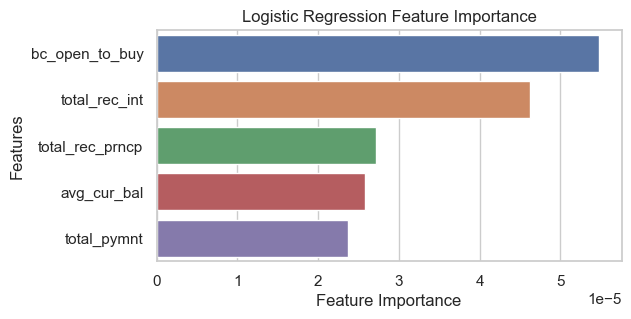

In [29]:
feature_names = X_train.columns  # Replace X_train with your actual feature data

# Get the absolute values of the coefficients for feature importances
coefficients = np.abs(lr.coef_[0])

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(coefficients)[::-1]
sorted_feature_importance = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x=sorted_feature_importance, y=sorted_feature_names)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

- Gaussian Naive Bayes

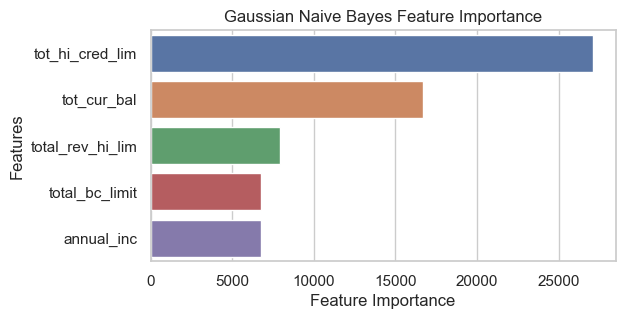

In [30]:
# Calculate feature importance based on the standard deviation of each feature
feature_importance = np.std(gnb.theta_, axis=0)

# Get the feature names from your input data or a predefined list
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x = sorted_feature_importance, y = sorted_feature_names)
plt.title('Gaussian Naive Bayes Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

- Decision Tree

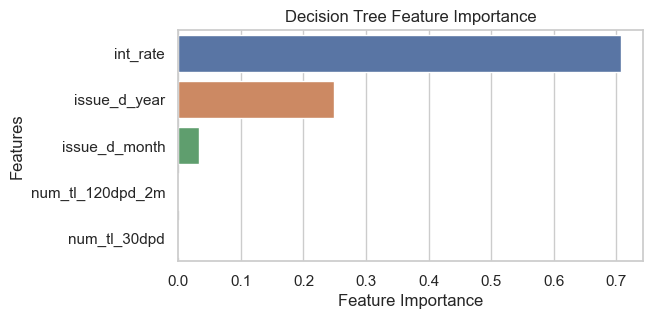

In [31]:
# Calculate feature importance based on the standard deviation of each feature
feature_importance = dt.feature_importances_

# Get the feature names from your input data or a predefined list
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x = sorted_feature_importance, y = sorted_feature_names)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

- Random Forest

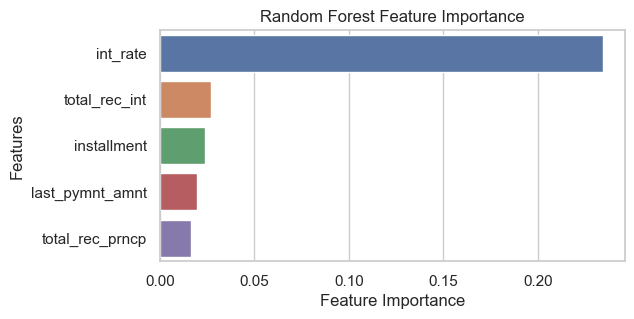

In [32]:
# Calculate feature importance based on the standard deviation of each feature
feature_importance = rf.feature_importances_

# Get the feature names from your input data or a predefined list
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x = sorted_feature_importance, y = sorted_feature_names)
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

- Bootstrap Aggregating

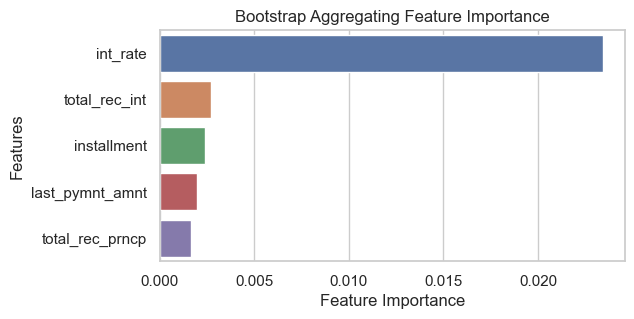

In [33]:
# Calculate feature importance based on the standard deviation of each feature
feature_importance /= len(bag.estimators_)

# Get the feature names from your input data or a predefined list
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x = sorted_feature_importance, y = sorted_feature_names)
plt.title('Bootstrap Aggregating Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

- Adaptive Boosting

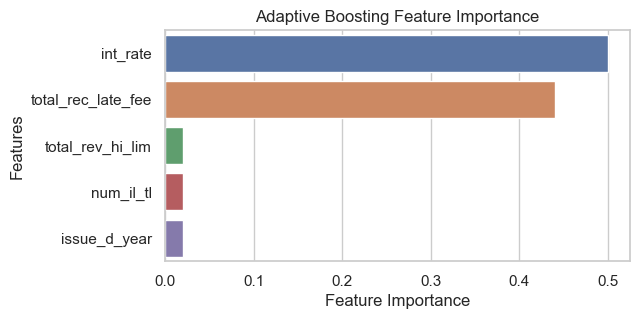

In [34]:
# Calculate feature importance based on the standard deviation of each feature
feature_importance = ada.feature_importances_

# Get the feature names from your input data or a predefined list
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x = sorted_feature_importance, y = sorted_feature_names)
plt.title('Adaptive Boosting Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

- Light Gradient Boosting

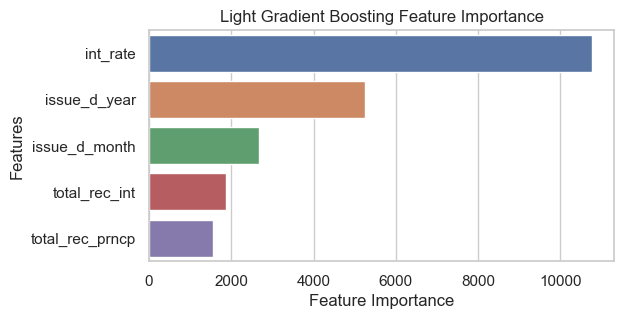

In [35]:
# Calculate feature importance based on the standard deviation of each feature
feature_importance = lgb.feature_importances_

# Get the feature names from your input data or a predefined list
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x = sorted_feature_importance, y = sorted_feature_names)
plt.title('Light Gradient Boosting Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

- Extreme Gradient Boosting

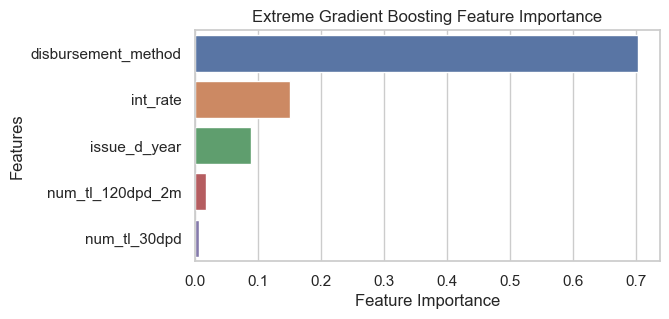

In [36]:
# Calculate feature importance based on the standard deviation of each feature
feature_importance = xgb.feature_importances_

# Get the feature names from your input data or a predefined list
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Limit to top 5 feature importances
top_n = 5
sorted_feature_importance = sorted_feature_importance[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Plot feature importance
plt.figure(figsize=(6, 3))
sns.barplot(x = sorted_feature_importance, y = sorted_feature_names)
plt.title('Extreme Gradient Boosting Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()